# Sentiment Analysis

# 1. Basic Feature Extraction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


import re
import spacy

import nltk
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize

from string import punctuation


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from wordcloud import WordCloud


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install wordcloud
# https://www.kaggle.com/sayonwork230/sentiment-analysis-with-word-cloud

In [3]:
train_csv = 'C:/Users/zheng/Desktop/Data Science/Presentations/Mod 9//Train.csv'
test_csv = 'C:/Users/zheng/Desktop/Data Science/Presentations/Mod 9//Test.csv'
valid_csv = 'C:/Users/zheng/Desktop/Data Science/Presentations/Mod 9//Valid.csv'

train = pd.read_csv(train_csv)
test = pd.read_csv(test_csv)
valid = pd.read_csv(valid_csv)

In [4]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


Do some EDA.

In [5]:
train.label.unique()

array([0, 1], dtype=int64)

In [6]:
train.label.value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


We can see there are 40000 entries and there's not a single null value. The dataset comprises movie reviews with a positive (1) or negative (0) value pretty equally distributed. SInce there are too many examples for our computation capacity, we'll split the dataset and reduce it.

# 1.1 We do some cleaning.

In [8]:
stopword = nltk.corpus.stopwords.words('english')
stopword.remove('not')

In [9]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)                                             #tokenize
    lower = [word.lower() for word in tokens]                                     #lowercase
    no_stopwords = [word for word in lower if word not in stopword]               #remove stopwords
    no_alpha = [word for word in no_stopwords if word.isalpha()]                  #remove numbers
    lemm_text = [wn.lemmatize(word) for word in no_alpha]                         #lemmatize
    clean_text = lemm_text
    return clean_text

In [11]:
train['clean']=train['text'].apply(clean)
train['clean']=train['clean'].apply(lambda x: " ".join([str(word) for word in x]))

# 1.2 Common word removal
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [12]:
freq = pd.Series(' '.join(train['clean']).split()).value_counts()[:10]
freq

br           161465
movie         80000
film          72171
one           42900
like          32243
time          23745
good          23198
character     22272
would         21182
even          19881
dtype: int64

In [13]:
freq = list(freq.index)


In [14]:
freq.remove('like')

In [15]:
freq.remove('good')

In [16]:
freq

['br', 'movie', 'film', 'one', 'time', 'character', 'would', 'even']

In [17]:
train['clean'] = train['clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['clean'].sample(20)

18130    lame ridiculous absurd year old son talked u w...
32845    saw day santa fe festival delighted honesty hu...
29253    love story set back drop television news three...
39646    also disappointed starter thing happen seem te...
9944     frequently voted china greatest ever chinese c...
31775    uzumaki japanese spiral vortex absurd ever wat...
30110    take look face alongside entrance jail face ho...
30471    screaming low budget horror shot video feature...
37361    really promote kid nicer better attitude famil...
24272    offer absolutely imagination premise execution...
11641    well must admit saw trailer looking forward ge...
15148    wonderful fanciful stardust could easily end s...
9061     several stowaway get russian ship bound france...
25622    ok year ago awesome funny mask came everyone l...
24408    buzz always fabulous graphic make kevin bacon ...
35619    found look basement good great young psychiatr...
20737    probably never made blip radar screen got quit.

# 1.3 Rare words removal
Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [18]:
freq1 = pd.Series(' '.join(train['clean']).split()).value_counts()[-7196:]
freq1

barthélémy     1
millenial      1
personaly      1
lan            1
tallahassee    1
              ..
mortitz        1
gearin         1
devoy          1
hervey         1
roti           1
Length: 7196, dtype: int64

In [19]:
freq1 = list(freq1.index)

In [20]:
%%time
train['clean'] = train['clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
train['clean'].sample(20)

Wall time: 22min 35s


14493    yet another people know exists slow picturesqu...
31082    waste pretentious beginning think something go...
3839     reviewer summed sewage perfectly seems little ...
14326    amazed thomas gibson come head pack earlier ca...
15851    manna heaven terrific predictable unpredictabl...
20201    last year worked different indie professional ...
39356    different jimmy done warner national smaller s...
23347    first saw teenager heavy metal ruled world tri...
24062    saw first thing jumped acting kelly overton yo...
11421    opportunity see hitherto known golden door imp...
14435    shame give low rating like doug mcclure peter ...
31631    working girl kitty sothern engaged bill kelly ...
35209    watched also altho well done found heartbreake...
151      ernest worrell come third presentation jim var...
22947    hollywood fail capture full range experience t...
19350    domini enfilren marlene dietrich spent life ca...
15534    went see low expectation hoping charmed seeing.

def tokenize(text):
    
    text = nltk.word_tokenize(text)
    return text

train['clean'] = train['clean'].apply(tokenize)

train['clean']=train['clean'].apply(lambda x: " ".join([str(word) for word in x]))

## 1.4 Word Cloud

Creating word clouds...
Wall time: 1min 2s


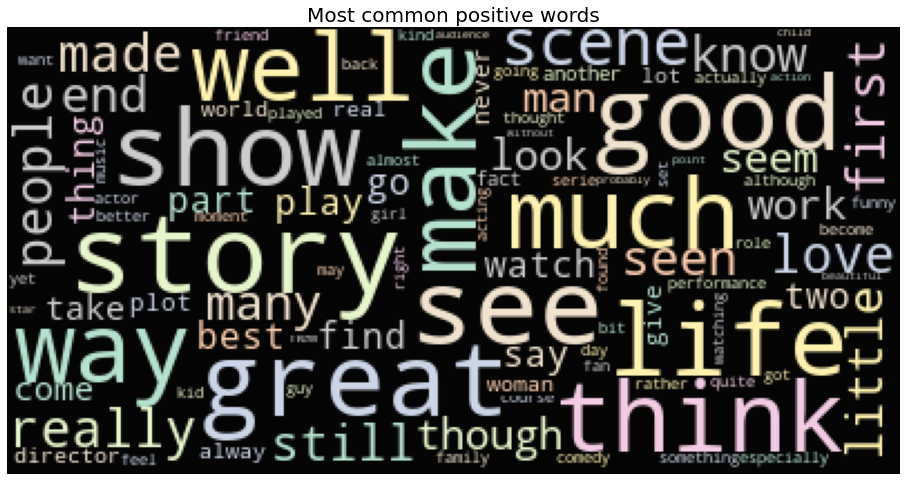

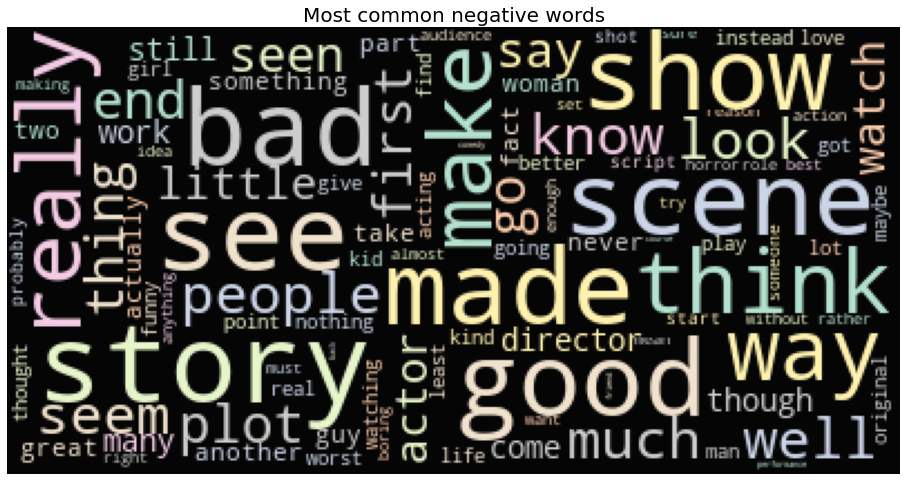

In [21]:
%%time

from wordcloud import WordCloud
from collections import Counter

def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="black", max_words=100, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')
    

print("Creating word clouds...")
positive_words=" ".join(train[train.label==1]['clean'].values)
negative_words=" ".join(train[train.label==0]['clean'].values)

generate_wordcloud(positive_words,"positive")
generate_wordcloud(negative_words,"negative")

## 1.5 Modelling

In [22]:
# helper function to show results and charts
def show_summary_report(actual, prediction, predict_proba):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, predict_proba)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, predict_proba)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

## 1.6 Set Feature Labels

In [23]:
# Features and Labels
X = train['clean']
y = train['label']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size = 0.2, random_state=42)

print("Data distribution:\n- Train: {} \n- Test: {}".format(len(y_train),len(y_test)))

Data distribution:
- Train: 3200 
- Test: 800


# 2 Feature Engineering

##  2.A Use CountVectorizer as Feature

In [24]:
%%time

# create a matrix of word counts from the text
count_vect = CountVectorizer(token_pattern = r'\w{1,}')

Wall time: 0 ns


In [25]:
%%time

# do the actual counting
A = count_vect.fit_transform(X_train, y_train)

Wall time: 606 ms


In [26]:
%%time


# Transform documents to document-term matrix.
X_train_count = count_vect.transform(X_train)
X_test_count = count_vect.transform(X_test)

Wall time: 665 ms


##  2.B Use TF-IDF as Feature

- Word level
- N-Gram level
- Character level


## 2.B.1 Word Level

In [27]:
%%time
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect)

B1 = tfidf_vect.fit(X_train, y_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf  = tfidf_vect.transform(X_test)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=True, vocabulary=None)
Wall time: 1.31 s


## 2.B.2 N-Gram Level

In [28]:
%%time
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 3),
                                   max_features = 5000)
print(tfidf_vect_ngram)

B2 = tfidf_vect_ngram.fit(X_train, y_train)
X_train_tfidf_ngram = tfidf_vect_ngram.transform(X_train)
X_test_tfidf_ngram  = tfidf_vect_ngram.transform(X_test)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(2, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=True, vocabulary=None)
Wall time: 5.63 s


## 2.B.3 Char Level

In [29]:
%%time
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer = 'char',
                                         token_pattern = r'\w{1,}',
                                         ngram_range = (2, 3),
                                         max_features = 5000)
print(tfidf_vect_ngram_chars)

B3 = tfidf_vect_ngram_chars.fit(X_train, y_train)
X_train_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_train)
X_test_tfidf_ngram_chars  = tfidf_vect_ngram_chars.transform(X_test)

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(2, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=True, vocabulary=None)
Wall time: 9.82 s


## 2.C Topic Model as Features

In [30]:
%%time
# train a LDA Model
lda_model = LatentDirichletAllocation(n_components = 20, learning_method = 'online', max_iter = 20)

X_topics = lda_model.fit_transform(X_train_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

Wall time: 1min 9s


In [31]:
# view the topic models
n_top_words = 10
topic_summaries = []
print('Group Top Words')
print('-----', '-'*80)
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    top_words = ' '.join(topic_words)
    topic_summaries.append(top_words)
    print('  %3d %s' % (i, top_words))

Group Top Words
----- --------------------------------------------------------------------------------
    0 holmes ahmad helsing norwegian tingle jaffar elvis abu flag korda
    1 zombie roy dean karloff braveheart dorothy suzanne boyce lugosi bela
    2 melville le rififi heist delon rouge cercle montand robbery volonté
    3 life story man world love show performance way first year
    4 streisand berkeley vocal orchestra judy thornway broadway unintelligible garland sang
    5 like good really get see make bad could story scene
    6 rackham deth jed kristofferson burt shahrukh duckman longtime armored connery
    7 principle burned ogre bava metal settled sammi kriemhild lamberto paltrow
    8 prue underdog phoebe piper kells shax gillian akin abbot bleeth
    9 frank hitchcock stewart hitler nurse betty opera hardy freeman britain
   10 cinderella kersey meeker snafu cassidy langdon pope mcgoohan silvano bust
   11 seagal custer west steven award arthur bergman davy jordan black


# 3 Text Classification

## helper function

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    predict_proba = classifier.predict_proba(feature_vector_valid)[:,1]

## 3.A Naive Bayes Classifier

### 3.A.1 Count Vectorizer

In [32]:
%%time
# define model

model_3_A = MultinomialNB()

# fit the training dataset on the classifier

A1 =  model_3_A.fit(X_train_count, y_train)

# predict the labels on validation dataset

predictions_A1 = model_3_A.predict(X_test_count)
predict_proba_A1 = model_3_A.predict_proba(X_test_count)[:,1]

Wall time: 16 ms


### 3.A.2 Naive Bayes on Word Level TF IDF Vectors

In [33]:
%%time
A2 = model_3_A.fit(X_train_tfidf, y_train)

predictions_A2 = model_3_A.predict(X_test_tfidf)
predict_proba_A2 = model_3_A.predict_proba(X_test_tfidf)[:,1]

Wall time: 15.6 ms


### 3.A.3 Naive Bayes on Ngram Level TF IDF Vectors

In [34]:
%%time
A3 = model_3_A.fit(X_train_tfidf_ngram, y_train)

predictions_A3 = model_3_A.predict(X_test_tfidf_ngram)
predict_proba_A3 = model_3_A.predict_proba(X_test_tfidf_ngram)[:,1]

Wall time: 0 ns


### 3.A.4 Naive Bayes on Character Level TF IDF Vectors

In [35]:
%%time
A4 = model_3_A.fit(X_train_tfidf_ngram_chars, y_train)

predictions_A4 = model_3_A.predict(X_test_tfidf_ngram_chars)
predict_proba_A4 = model_3_A.predict_proba(X_test_tfidf_ngram_chars)[:,1]

Wall time: 24.6 ms


## 3.B Linear Classifier

### 3.B.1 Linear Classifier on Count Vectors

In [36]:
%%time
model_3_B = LogisticRegression(solver = 'lbfgs', max_iter = 100)


# fit the training dataset on the classifier

B1 =  model_3_B.fit(X_train_count, y_train)

# predict the labels on validation dataset

predictions_B1 = model_3_B.predict(X_test_count)
predict_proba_B1 = model_3_B.predict_proba(X_test_count)[:,1]

Wall time: 504 ms


### 3.B.2 Linear Classifier on Word Level TF IDF Vectors

In [37]:
%%time
B2 = model_3_B.fit(X_train_tfidf, y_train)

predictions_B2 = model_3_B.predict(X_test_tfidf)
predict_proba_B2 = model_3_B.predict_proba(X_test_tfidf)[:,1]

Wall time: 80 ms


### 3.B.3 Linear Classifier on Ngram Level TF IDF Vectors

In [38]:
%%time
B3 = model_3_B.fit(X_train_tfidf_ngram, y_train)

predictions_B3 = model_3_B.predict(X_test_tfidf_ngram)
predict_proba_B3 = model_3_B.predict_proba(X_test_tfidf_ngram)[:,1]

Wall time: 32 ms


### 3.B.4 Linear Classifier on Character Level TF IDF Vectors

In [39]:
%%time
B4 = model_3_B.fit(X_train_tfidf_ngram_chars, y_train)

predictions_B4 = model_3_B.predict(X_test_tfidf_ngram_chars)
predict_proba_B4 = model_3_B.predict_proba(X_test_tfidf_ngram_chars)[:,1]

Wall time: 256 ms


## 3.C Support Vector Classifier

### 3.C.1 Support Vector Classifier on Count Vectors

In [40]:
%%time
# define model

model_3_C = SVC(kernel='linear', probability=True)

# fit the training dataset on the classifier

C1 =  model_3_C.fit(X_train_count, y_train)

# predict the labels on validation dataset

predictions_C1 = model_3_C.predict(X_test_count)
predict_proba_C1 = model_3_C.predict_proba(X_test_count)[:,1]

Wall time: 1min 11s


### 3.C.2 Support Vector Classifier on Word Level TF IDF Vectors

In [41]:
%%time
C2 = model_3_C.fit(X_train_tfidf, y_train)

predictions_C2 = model_3_C.predict(X_test_tfidf)
predict_proba_C2 = model_3_C.predict_proba(X_test_tfidf)[:,1]

Wall time: 53.7 s


### 3.C.3 Support Vector Classifier on Ngram Level TF IDF Vectors

In [42]:
%%time

C3 = model_3_C.fit(X_train_tfidf_ngram, y_train)

predictions_C3 = model_3_C.predict(X_test_tfidf_ngram)
predict_proba_C3 = model_3_C.predict_proba(X_test_tfidf_ngram)[:,1]

Wall time: 11.1 s


### 3.C.4 Support Vector Classifier on Character Level TF IDF Vectors

In [43]:
%%time
C4 = model_3_C.fit(X_train_tfidf_ngram_chars, y_train)

predictions_C4 = model_3_C.predict(X_test_tfidf_ngram_chars)
predict_proba_C4 = model_3_C.predict_proba(X_test_tfidf_ngram_chars)[:,1]

Wall time: 7min 20s


## 3.D Bagging Models

### 3.D.1 Bagging (Random Forest) on Count Vectors

In [44]:
%%time
# define model

model_3_D = RandomForestClassifier(n_estimators = 100)

# fit the training dataset on the classifier

D1 =  model_3_D.fit(X_train_count, y_train)

# predict the labels on validation dataset

predictions_D1 = model_3_D.predict(X_test_count)
predict_proba_D1 = model_3_D.predict_proba(X_test_count)[:,1]

Wall time: 5.11 s


### 3.D.2 Bagging (Random Forest) on Word Level TF IDF Vectors

In [45]:
%%time
D2 = model_3_D.fit(X_train_tfidf, y_train)

predictions_D2 = model_3_D.predict(X_test_tfidf)
predict_proba_D2 = model_3_D.predict_proba(X_test_tfidf)[:,1]

Wall time: 3.89 s


### 3.D.3 Bagging (Random Forest) on Ngram Level TF IDF Vectors

In [46]:
%%time
D3 = model_3_D.fit(X_train_tfidf_ngram, y_train)

predictions_D3 = model_3_D.predict(X_test_tfidf_ngram)
predict_proba_D3 = model_3_D.predict_proba(X_test_tfidf_ngram)[:,1]

Wall time: 3.36 s


### 3.D.4 Bagging (Random Forest) on Character Level TF IDF Vectors

In [47]:
%%time
D4 = model_3_D.fit(X_train_tfidf_ngram_chars, y_train)

predictions_D4 = model_3_D.predict(X_test_tfidf_ngram_chars)
predict_proba_D4 = model_3_D.predict_proba(X_test_tfidf_ngram_chars)[:,1]

Wall time: 14.3 s


## 3.E Boosting Models

### 3.E.1 Gradient Boosting on Count Vectors

In [48]:
%%time
# define model

model_3_E = GradientBoostingClassifier()

# fit the training dataset on the classifier

E1 =  model_3_E.fit(X_train_count, y_train)

# predict the labels on validation dataset

predictions_E1 = model_3_E.predict(X_test_count)
predict_proba_E1 = model_3_E.predict_proba(X_test_count)[:,1]

Wall time: 8.09 s


### 3.E.2 Gradient Boosting on Word Level TF IDF Vectors

In [49]:
%%time
E2 = model_3_E.fit(X_train_tfidf, y_train)

predictions_E2 = model_3_E.predict(X_test_tfidf)
predict_proba_E2 = model_3_E.predict_proba(X_test_tfidf)[:,1]

Wall time: 11.6 s


### 3.E.3 Gradient Boosting on Ngram Level TF IDF Vectors

In [50]:
%%time
E3 = model_3_E.fit(X_train_tfidf_ngram, y_train)

predictions_E3 = model_3_E.predict(X_test_tfidf_ngram)
predict_proba_E3 = model_3_E.predict_proba(X_test_tfidf_ngram)[:,1]

Wall time: 1.7 s


### 3.E.4 Gradient Boosting on Character Level TF IDF Vectors

In [51]:
%%time
E4 = model_3_E.fit(X_train_tfidf_ngram_chars, y_train)

predictions_E4 = model_3_E.predict(X_test_tfidf_ngram_chars)
predict_proba_E4 = model_3_E.predict_proba(X_test_tfidf_ngram_chars)[:,1]

Wall time: 1min 59s


# 4. Show Summary Report

## 4.A Naive Bayes

Accuracy : 0.8375 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8543 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7910 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8950                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


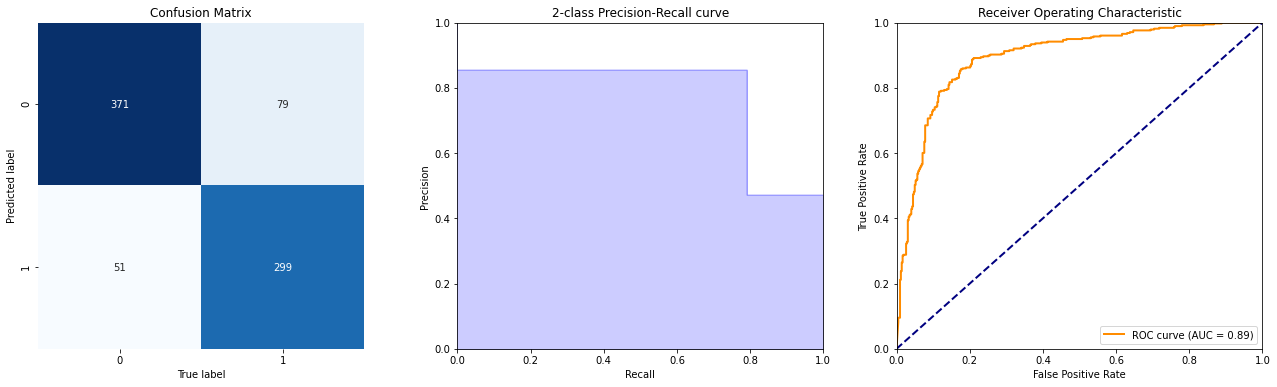

(0.8375, 0.8542857142857143, 0.791005291005291, 0.8949572456681463)

In [52]:
show_summary_report(y_test, predictions_A1, predict_proba_A1)

Accuracy : 0.8425 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8520 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8069 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9188                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


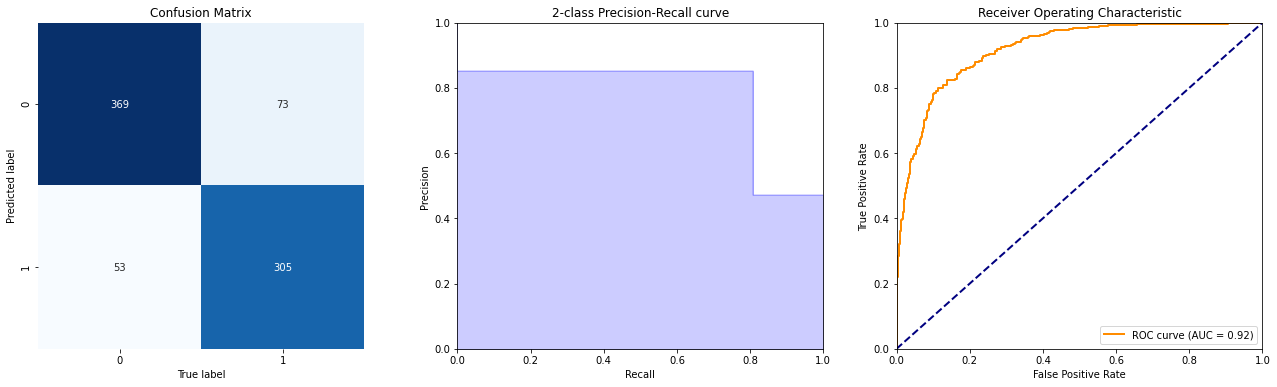

(0.8425, 0.8519553072625698, 0.8068783068783069, 0.91875423155044)

In [53]:
show_summary_report(y_test, predictions_A2, predict_proba_A2)

Accuracy : 0.7588 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7454 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7434 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8368                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


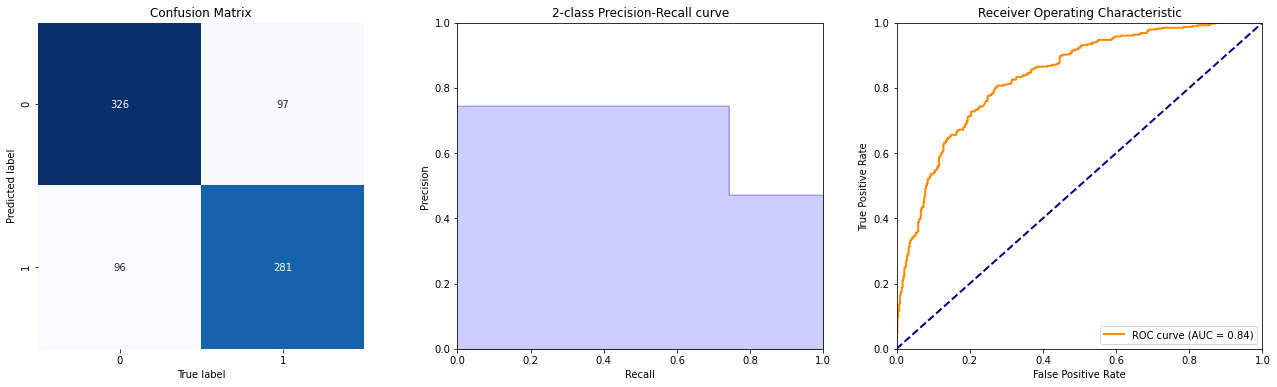

(0.75875, 0.7453580901856764, 0.7433862433862434, 0.8367812633215478)

In [54]:
show_summary_report(y_test, predictions_A3, predict_proba_A3)

Accuracy : 0.7975 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8051 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7540 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8839                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


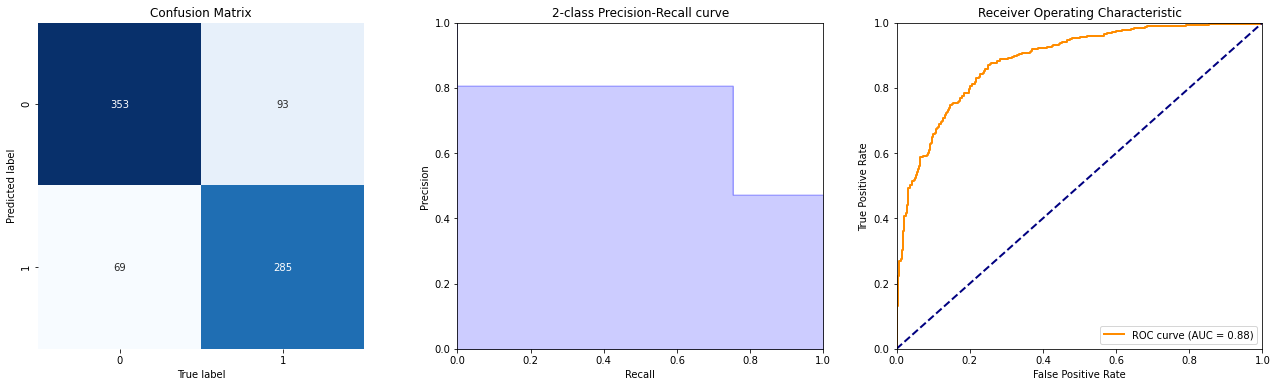

(0.7975, 0.8050847457627118, 0.753968253968254, 0.883942676596705)

In [55]:
show_summary_report(y_test, predictions_A4, predict_proba_A4)

## 4.B Linear Classifier

Accuracy : 0.8400 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8205 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8466 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9111                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


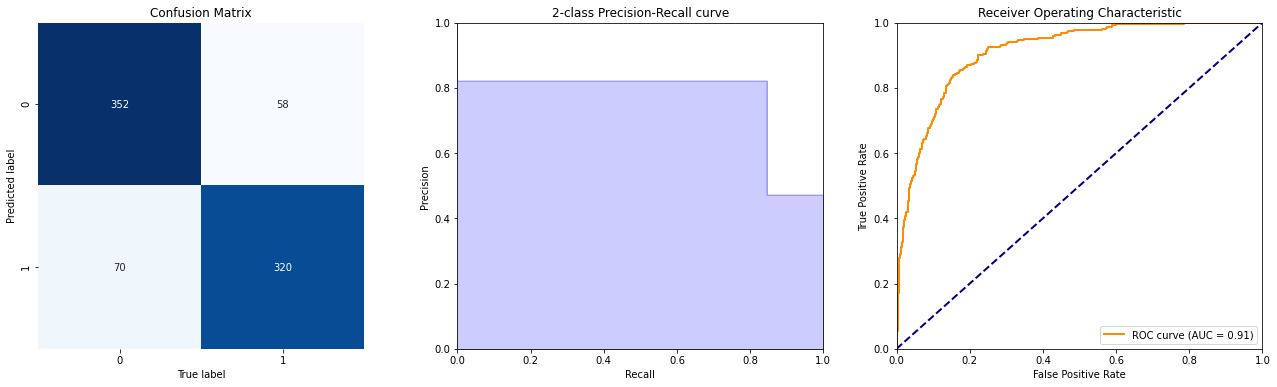

(0.84, 0.8205128205128205, 0.8465608465608465, 0.9110747511221445)

In [56]:
show_summary_report(y_test, predictions_B1, predict_proba_B1)

Accuracy : 0.8450 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8290 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8466 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9270                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


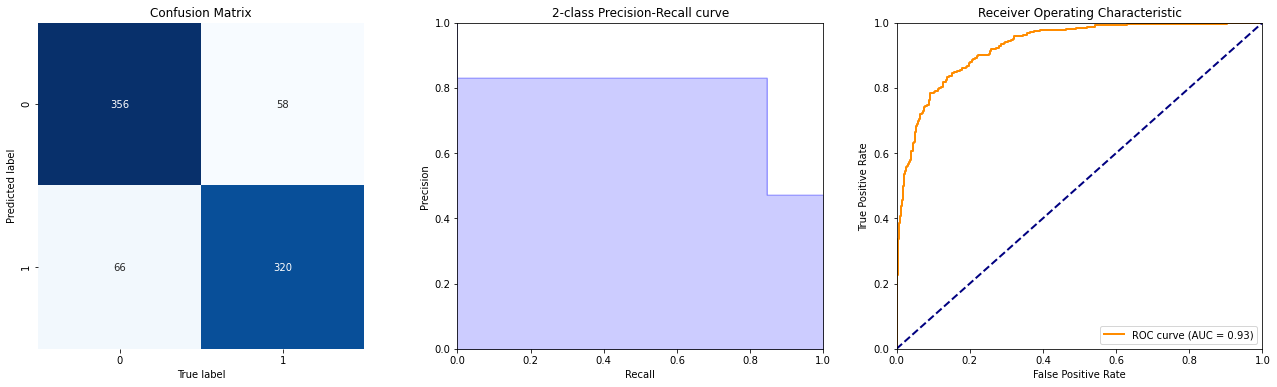

(0.845, 0.8290155440414507, 0.8465608465608465, 0.9270292635221545)

In [57]:
show_summary_report(y_test, predictions_B2, predict_proba_B2)

Accuracy : 0.7600 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7337 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7725 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8278                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


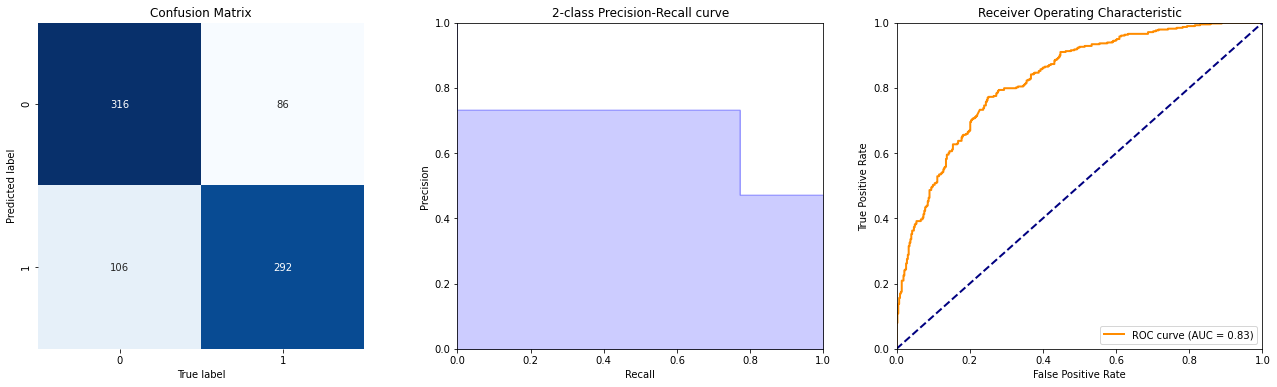

(0.76, 0.7336683417085427, 0.7724867724867724, 0.8277790315705006)

In [58]:
show_summary_report(y_test, predictions_B3, predict_proba_B3)

Accuracy : 0.8137 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7959 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8148 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8897                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


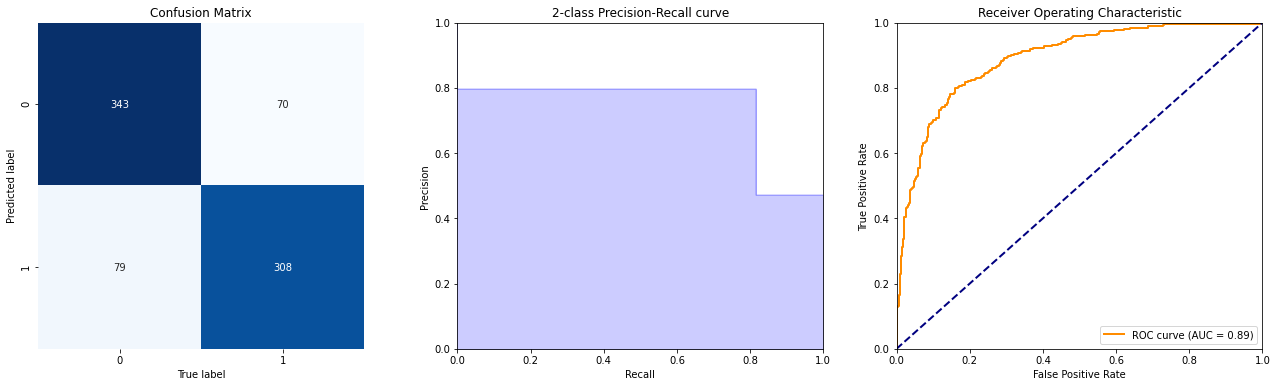

(0.81375, 0.7958656330749354, 0.8148148148148148, 0.8896850472679857)

In [59]:
show_summary_report(y_test, predictions_B4, predict_proba_B4)

## 4.C SVC

Accuracy : 0.8225 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7965 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8386 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8977                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


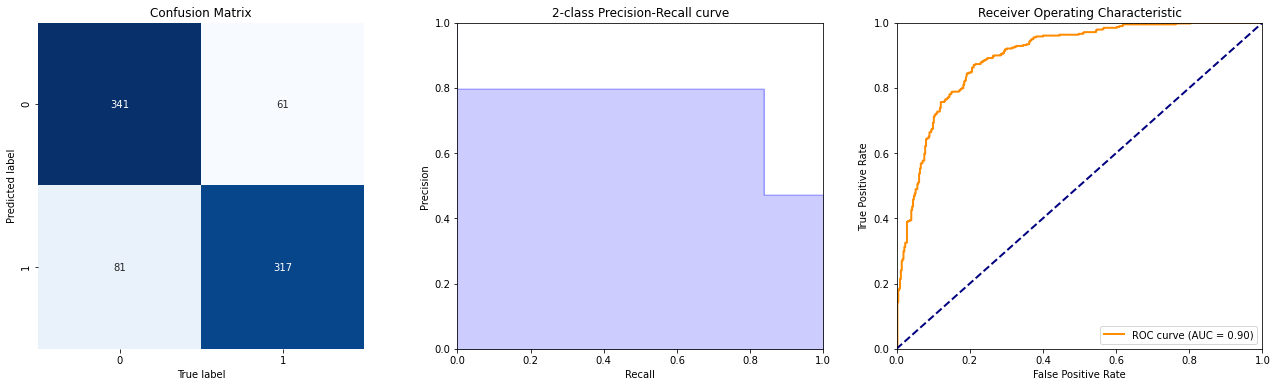

(0.8225, 0.7964824120603015, 0.8386243386243386, 0.8977312620677549)

In [60]:
show_summary_report(y_test, predictions_C1, predict_proba_C1)

Accuracy : 0.8387 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8201 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8439 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9222                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


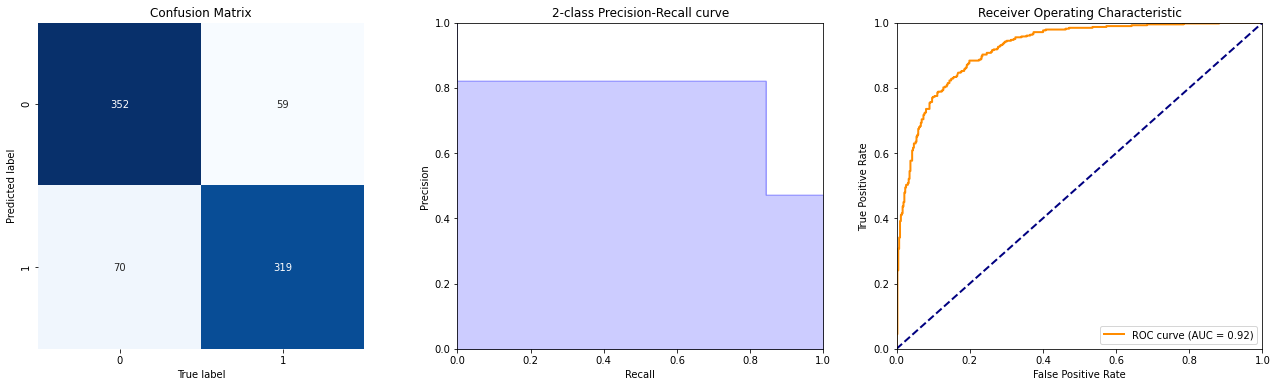

(0.83875, 0.8200514138817481, 0.843915343915344, 0.9221802201660022)

In [61]:
show_summary_report(y_test, predictions_C2, predict_proba_C2)

Accuracy : 0.7325 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6990 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7619 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8044                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


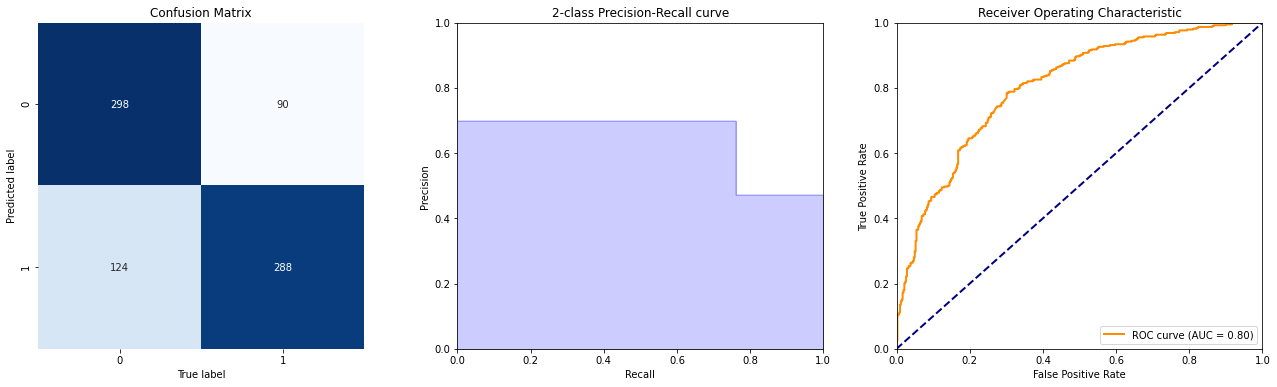

(0.7325, 0.6990291262135923, 0.7619047619047619, 0.8044083352140223)

In [62]:
show_summary_report(y_test, predictions_C3, predict_proba_C3)

Accuracy : 0.8137 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7870 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8307 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8937                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


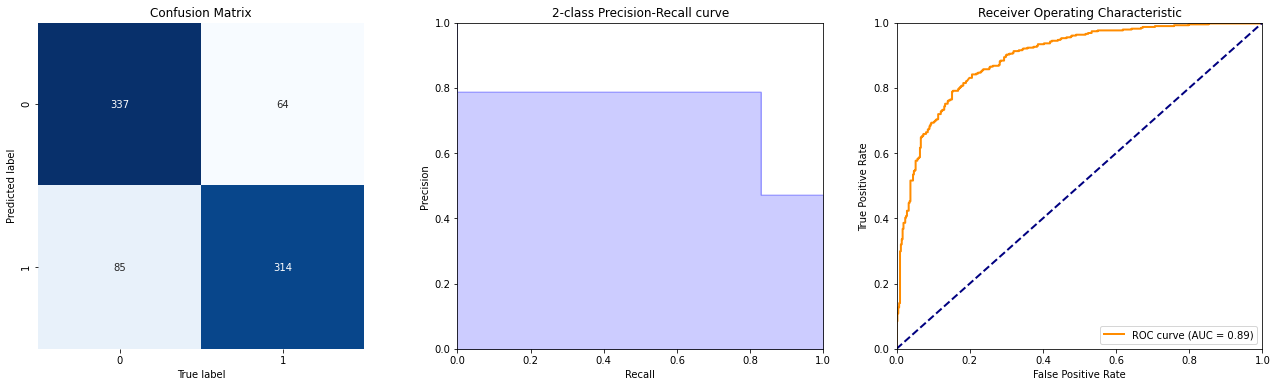

(0.81375, 0.7869674185463659, 0.8306878306878307, 0.8937285287996188)

In [63]:
show_summary_report(y_test, predictions_C4, predict_proba_C4)

## 4.D Bagging Models

Accuracy : 0.8475 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8351 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8439 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9257                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


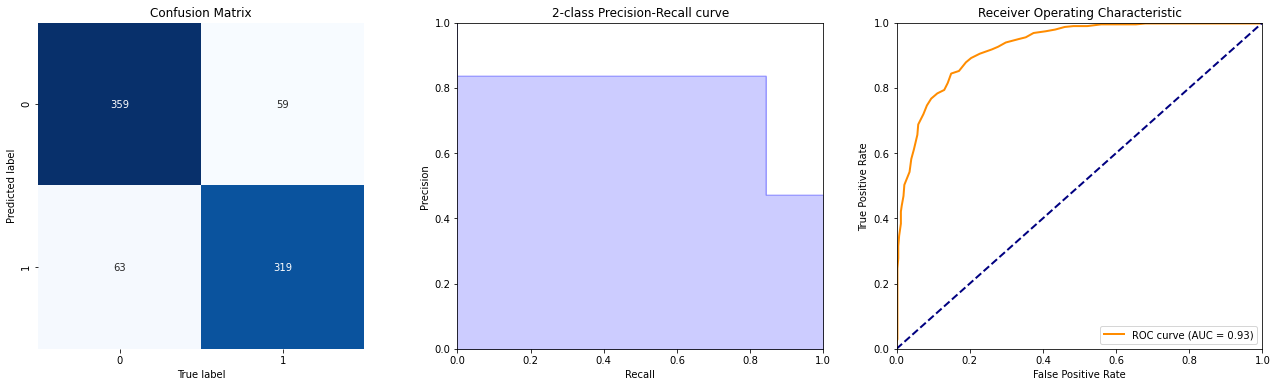

(0.8475, 0.8350785340314136, 0.843915343915344, 0.9256845708267508)

In [64]:
show_summary_report(y_test, predictions_D1, predict_proba_D1)

Accuracy : 0.8225 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8207 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7989 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9135                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


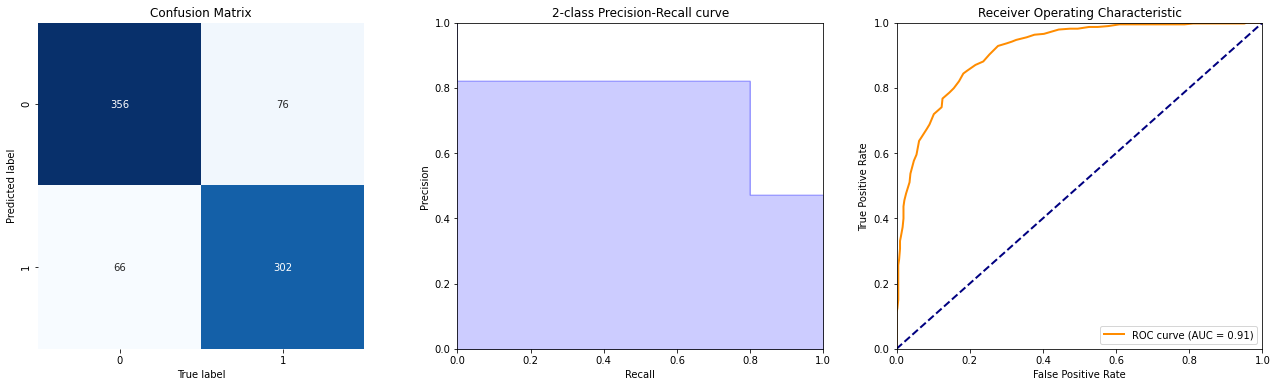

(0.8225, 0.8206521739130435, 0.798941798941799, 0.9134506883322049)

In [65]:
show_summary_report(y_test, predictions_D2, predict_proba_D2)

Accuracy : 0.7087 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6790 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7275 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7886                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


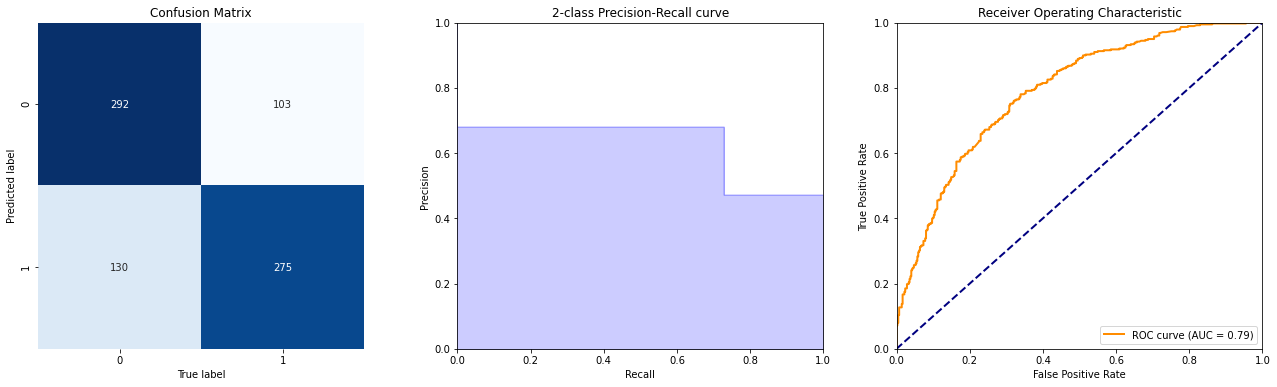

(0.70875, 0.6790123456790124, 0.7275132275132276, 0.7886450262042679)

In [66]:
show_summary_report(y_test, predictions_D3, predict_proba_D3)

Accuracy : 0.7913 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8040 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7381 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8653                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


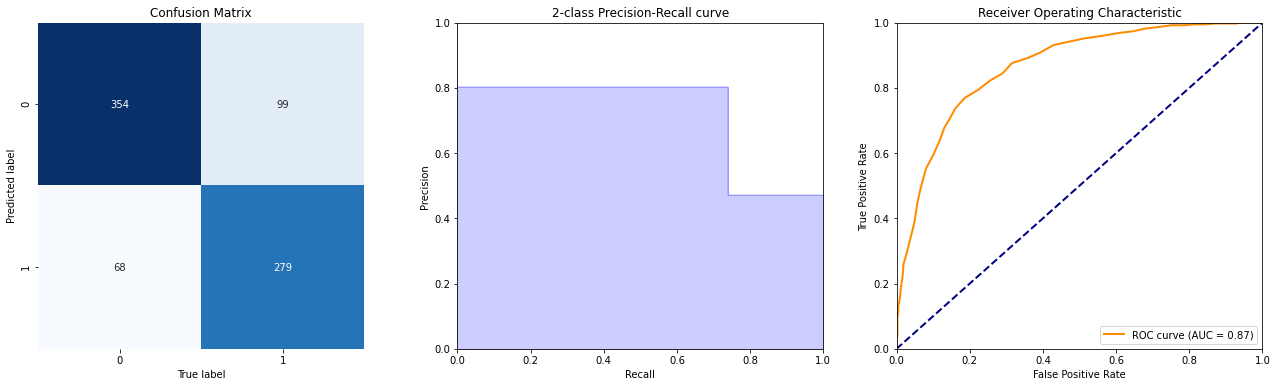

(0.79125, 0.8040345821325648, 0.7380952380952381, 0.8652862408786579)

In [67]:
show_summary_report(y_test, predictions_D4, predict_proba_D4)

## 4.E Boosting Models

Accuracy : 0.8050 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7721 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8333 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8927                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


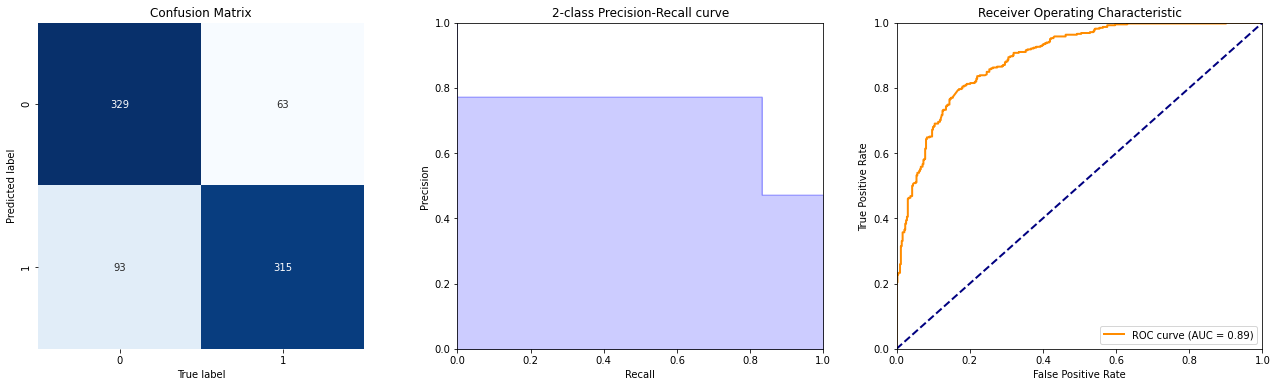

(0.805, 0.7720588235294118, 0.8333333333333334, 0.8927223601394217)

In [68]:
show_summary_report(y_test, predictions_E1, predict_proba_E1)

Accuracy : 0.7837 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7470 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8201 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8794                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


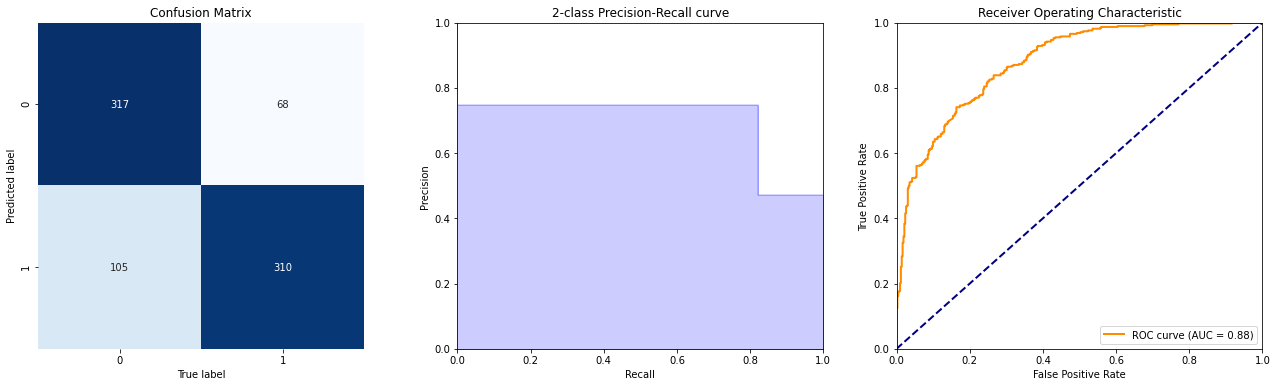

(0.78375, 0.7469879518072289, 0.8201058201058201, 0.8794384262393742)

In [69]:
show_summary_report(y_test, predictions_E2, predict_proba_E2)

Accuracy : 0.6550 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5938 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8545 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7387                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


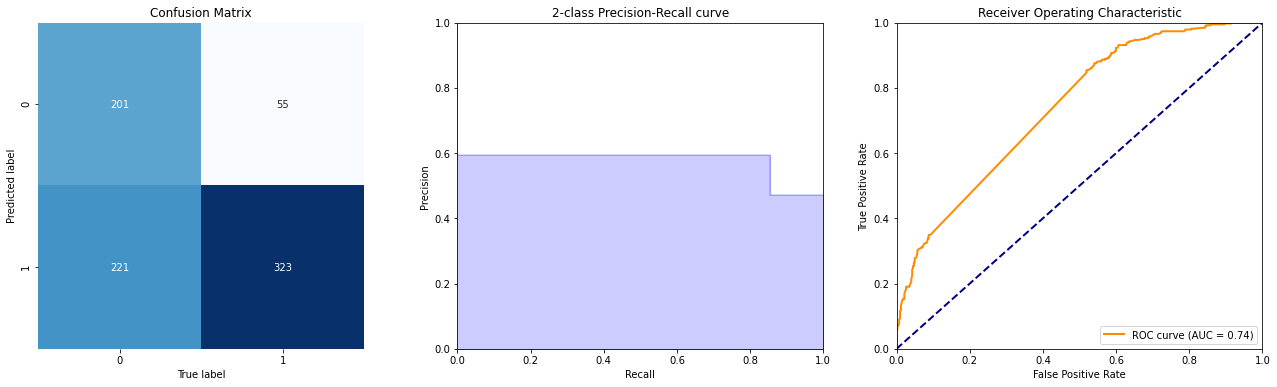

(0.655, 0.59375, 0.8544973544973545, 0.7386970586022719)

In [70]:
show_summary_report(y_test, predictions_E3, predict_proba_E3)

Accuracy : 0.7750 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7526 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7804 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8729                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


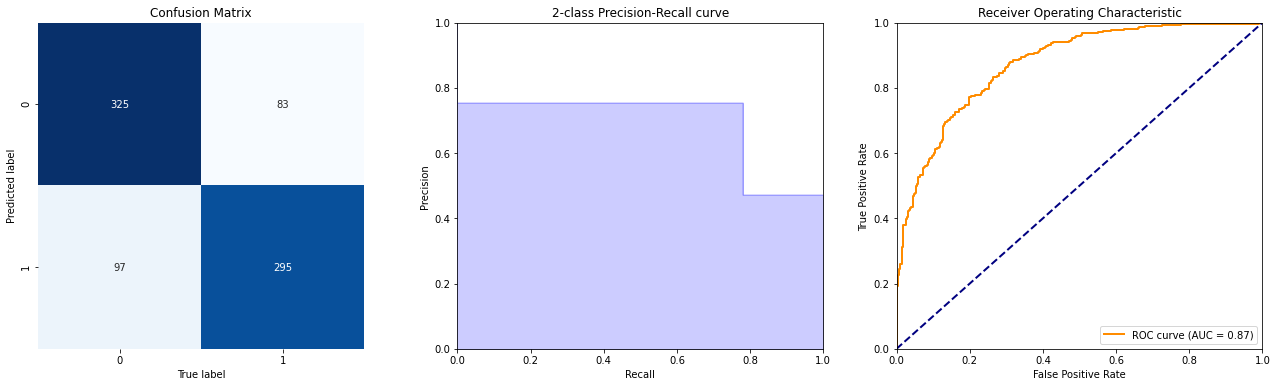

(0.775, 0.7525510204081632, 0.7804232804232805, 0.8728967627071893)

In [71]:
show_summary_report(y_test, predictions_E4, predict_proba_E4)

# 5 In Summary

In [72]:
results = {
    'NB Count Vectorizer' : [accuracy_score(y_test, predictions_A1), precision_score(y_test, predictions_A1), recall_score(y_test, predictions_A1), roc_auc_score(y_test, predict_proba_A1)],
    'NB TF-IDF Vectorizer': [accuracy_score(y_test, predictions_A2), precision_score(y_test, predictions_A2), recall_score(y_test, predictions_A2), roc_auc_score(y_test, predict_proba_A2)],
    'NB TF-IDF N-Gram': [accuracy_score(y_test, predictions_A3), precision_score(y_test, predictions_A3), recall_score(y_test, predictions_A3), roc_auc_score(y_test, predict_proba_A3)],
    'NB TF-IDF Char': [accuracy_score(y_test, predictions_A4), precision_score(y_test, predictions_A4), recall_score(y_test, predictions_A4), roc_auc_score(y_test, predict_proba_A4)],
    'LC Count Vectorizer': [accuracy_score(y_test, predictions_B1), precision_score(y_test, predictions_B1), recall_score(y_test, predictions_B1), roc_auc_score(y_test, predict_proba_B1)],
    'LC TF-IDF Vectorizer': [accuracy_score(y_test, predictions_B2), precision_score(y_test, predictions_B2), recall_score(y_test, predictions_B2), roc_auc_score(y_test, predict_proba_B2)],
    'LC TF-IDF N-Gram': [accuracy_score(y_test, predictions_B3), precision_score(y_test, predictions_B3), recall_score(y_test, predictions_B3), roc_auc_score(y_test, predict_proba_B3)],
    'LC TF-IDF Char': [accuracy_score(y_test, predictions_B4), precision_score(y_test, predictions_B4), recall_score(y_test, predictions_B4), roc_auc_score(y_test, predict_proba_B4)],
    'SVC Count Vectorizer': [accuracy_score(y_test, predictions_C1), precision_score(y_test, predictions_C1), recall_score(y_test, predictions_C1), roc_auc_score(y_test, predict_proba_C1)],
    'SVC TF-IDF Vectorizer': [accuracy_score(y_test, predictions_C2), precision_score(y_test, predictions_C2), recall_score(y_test, predictions_C2), roc_auc_score(y_test, predict_proba_C2)],
    'SVC TF-IDF N-Gram': [accuracy_score(y_test, predictions_C3), precision_score(y_test, predictions_C3), recall_score(y_test, predictions_C3), roc_auc_score(y_test, predict_proba_C3)],
    'SVC TF-IDF Char': [accuracy_score(y_test, predictions_C4), precision_score(y_test, predictions_C4), recall_score(y_test, predictions_C4), roc_auc_score(y_test, predict_proba_C4)],
    'RF Count Vectorizer': [accuracy_score(y_test, predictions_D1), precision_score(y_test, predictions_D1), recall_score(y_test, predictions_D1), roc_auc_score(y_test, predict_proba_D1)],
    'RF TF-IDF Vectorizer': [accuracy_score(y_test, predictions_D2), precision_score(y_test, predictions_D2), recall_score(y_test, predictions_D2), roc_auc_score(y_test, predict_proba_D2)],
    'RF TF-IDF N-Gram': [accuracy_score(y_test, predictions_D3), precision_score(y_test, predictions_D3), recall_score(y_test, predictions_D3), roc_auc_score(y_test, predict_proba_D3)],
    'RF TF-IDF Char': [accuracy_score(y_test, predictions_D4), precision_score(y_test, predictions_D4), recall_score(y_test, predictions_D4), roc_auc_score(y_test, predict_proba_D4)],
    'GB Count Vectorizer': [accuracy_score(y_test, predictions_E1), precision_score(y_test, predictions_E1), recall_score(y_test, predictions_E1), roc_auc_score(y_test, predict_proba_E1)],
    'GB TF-IDF Vectorizer': [accuracy_score(y_test, predictions_E2), precision_score(y_test, predictions_E2), recall_score(y_test, predictions_E2), roc_auc_score(y_test, predict_proba_E2)],
    'GB TF-IDF N-Gram': [accuracy_score(y_test, predictions_E3), precision_score(y_test, predictions_E3), recall_score(y_test, predictions_E3), roc_auc_score(y_test, predict_proba_E3)],
    'GB TF-IDF Char': [accuracy_score(y_test, predictions_E4), precision_score(y_test, predictions_E4), recall_score(y_test, predictions_E4), roc_auc_score(y_test, predict_proba_E4)]
        
}    

scores = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'ROC_AUC'] , columns=['NB Count Vectorizer','NB TF-IDF Vectorizer', 'NB TF-IDF N-Gram', 'NB TF-IDF Char', 'LC Count Vectorizer', 'LC TF-IDF Vectorizer', 'LC TF-IDF N-Gram', 'LC TF-IDF Char', 'SVC Count Vectorizer', 'SVC TF-IDF Vectorizer', 'SVC TF-IDF N-Gram', 'SVC TF-IDF Char', 'RF Count Vectorizer', 'RF TF-IDF Vectorizer', 'RF TF-IDF N-Gram', 'RF TF-IDF Char', 'GB Count Vectorizer', 'GB TF-IDF Vectorizer', 'GB TF-IDF N-Gram', 'GB TF-IDF Char'])
scores

,NB Count Vectorizer,NB TF-IDF Vectorizer,NB TF-IDF N-Gram,NB TF-IDF Char,LC Count Vectorizer,LC TF-IDF Vectorizer,LC TF-IDF N-Gram,LC TF-IDF Char,SVC Count Vectorizer,SVC TF-IDF Vectorizer,SVC TF-IDF N-Gram,SVC TF-IDF Char,RF Count Vectorizer,RF TF-IDF Vectorizer,RF TF-IDF N-Gram,RF TF-IDF Char,GB Count Vectorizer,GB TF-IDF Vectorizer,GB TF-IDF N-Gram,GB TF-IDF Char
Accuracy,0.837500,0.842500,0.758750,0.797500,0.840000,0.845000,0.760000,0.813750,0.822500,0.838750,0.732500,0.813750,0.847500,0.822500,0.708750,0.791250,0.805000,0.783750,0.655000,0.775000
Precision,0.854286,0.851955,0.745358,0.805085,0.820513,0.829016,0.733668,0.795866,0.796482,0.820051,0.699029,0.786967,0.835079,0.820652,0.679012,0.804035,0.772059,0.746988,0.593750,0.752551
Recall,0.791005,0.806878,0.743386,0.753968,0.846561,0.846561,0.772487,0.814815,0.838624,0.843915,0.761905,0.830688,0.843915,0.798942,0.727513,0.738095,0.833333,0.820106,0.854497,0.780423
ROC_AUC,0.894957,0.918754,0.836781,0.883943,0.911075,0.927029,0.827779,0.889685,0.897731,0.922180,0.804408,0.893729,0.925685,0.913451,0.788645,0.865286,0.892722,0.879438,0.738697,0.872897
